## Assignment 2
### Group 14 

> Github repository: https://github.com/LivDreyer/CSS24.git

> Shortlog of git commits:
- x  LivDreyer
- x  AIAndreas
- x  FelixxAI


> Contribution: The workload was distributed equally between all members of the group. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import netwulf as nu

### Part 1: Properties of the real-world network of Computational Social Scientists
#### Analyzing Networks through a Random Model

**1. Random Network:** Let's start by building a Random Network, acting as a baseline (or "null model") to understand the Computational Social Scientists Network better.


**First, calculate the probability (p) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding p, figure out the average degree (using the given formula).**

To calculate the probability *p* that the expected number of edges in our random network match the actual edge count in the CSS network, we look at equation 3.2 [1]: 

$$ <L> = p \frac{N(N-1)}{2}$$

As we know the number of links in our CSS network, we would like to isolate the probability *p* in the above equation like so: 

$$p = \frac{2L}{N(N-1)}$$

Please see the cell below and its output for the probability. 

In [2]:
# read the json file containing our network
with open('graph.json', 'r') as f:
    json_data = json.load(f)

G_CSS = nx.node_link_graph(json_data)

#get number of nodes and number of edges of CSS network
N = G_CSS.number_of_nodes()
L = G_CSS.number_of_edges()

#calculate probability p from formula
p = (2*L)/(N*(N-1))

print("Probability (p) that the expected number of edges in our random network match the actual edge count in the CSS network:", p)

Probability (p) that the expected number of edges in our random network match the actual edge count in the CSS network: 0.0004973040188454591


Furthermore, we would like to calculate the average degree of the random network utilizing formula 3.3 [1]:

$$<k> = p(N-1)$$

In [3]:
#calculate average degree k

k = p*(N-1)

print("Average degree k of a random network:", k)

Average degree k of a random network: 7.011489361702128



[1] Network Science. Albert-László Barabási. 2016. Cambridge United Kingdom: Cambridge University Press.

**Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated p. Generate a random network by linking nodes in every possible pair with probability p. Hint: you can use the function np.random.uniform to draw samples from a uniform probability distribution.**

In [4]:
#create function to generate a Random Network 

def generate_random_network(node_count, p, seed=None):
    #set random seed if provided
    if seed is not None:
        np.random.seed(seed)

    #create an empty graph
    G = nx.Graph()

    #add nodes
    G.add_nodes_from(range(node_count))

    #link nodes with probability p
    for i in range(node_count):
        for j in range(i+1, node_count):
            if np.random.uniform() < p:
                G.add_edge(i, j)

    return G


#define nodes and probability 
node_count =  N
p = p

#generate random network
random_network = generate_random_network(node_count, p)


print("Number of nodes in the Random Network:", random_network.number_of_nodes())
print("Number of edges in the Random Network:", random_network.number_of_edges())

Number of nodes in the Random Network: 14100
Number of edges in the Random Network: 49004


**Visualize the network as you did for the Computational Social Scientists network in the exercise above.**

To vizualize the Random Network we are using the netwulf library to create a graph. 

(<Figure size 480x480 with 1 Axes>, <Axes: >)

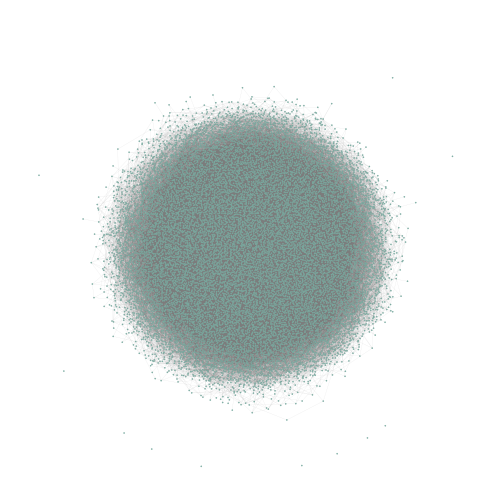

In [5]:
#function for visualizing network

def visualize(G):
    a, b = nu.visualize(G)
    return a, b

#visualize the plot using netwulf 
nu.draw_netwulf(visualize(random_network)[0])

**Answer the following questions (max 200 words in total):**

> What regime does your random network fall into? Is it above or below the critical threshold?

> According to the textbook, what does the network's structure resemble in this regime?

> Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

**2. Degree Distribution:** This section focuses on analyzing the degree distribution of both the actual Computational Social Scientists network and its random counterpart.

**Compute the distribution of degree for the random network using the numpy function `np.histogram`. Choose bins, and normalization strategies appropriately. Hint: Revisit the content from Week 3, Part 3 of the lectures.**

We construct a dictionary representing the degree distribution of the Random Network. Each key in the dictionary corresponds to a degree ranging from the minimum to the maximum degree observed in the network. The values associated with these keys indicate the frequency of nodes having that particular degree.

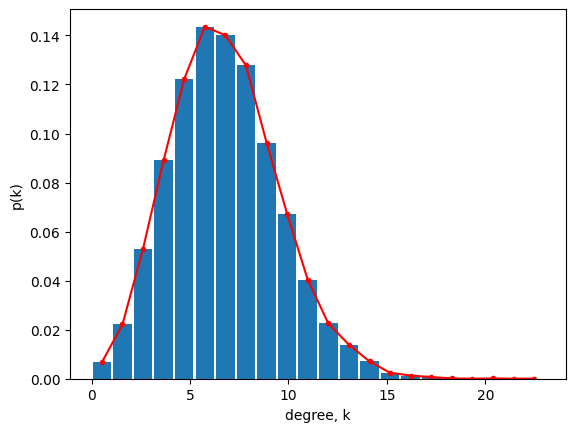

In [145]:
#init random network
G_random = random_network

#find index of node with maximum degrees for all nodes
degree_dict = dict(G_random.degree())

#dict values 
degrees = np.array(list(degree_dict.values()))

#compute histogram 
bins = np.linspace(min(degrees),max(degrees),23)
hist, edges = np.histogram(degrees,bins=bins,density=True)
width = bins[1]-bins[0]
x = (edges[1:]+edges[:-1])/2


#plot
fig,ax = plt.subplots()
ax.bar(x,hist,width=width*0.9)
ax.plot(x,hist,marker=".",color="red")
ax.set_xlabel("degree, k")
ax.set_ylabel("p(k)")

random_degree_distribution = fig

Text(0, 0.5, 'Probability Density')

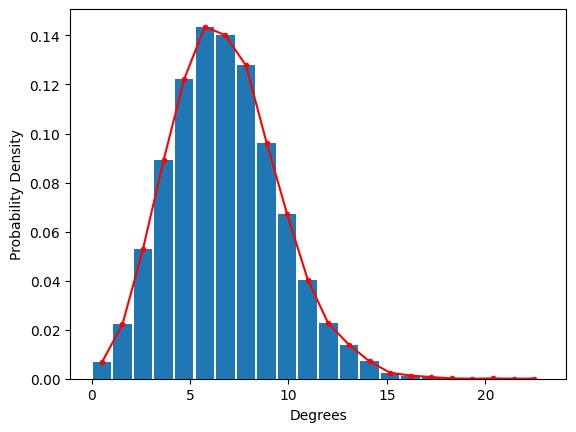

In [39]:
#dict keys 
degrees = np.array(list(random_graph_dict.keys()))

#dict values
frequencies = np.array(list(random_graph_dict.values()))

#compute histogram 
bins = np.linspace(min(degrees),max(degrees),23)
hist, edges = np.histogram(degrees,bins=bins,weights=frequencies,density=True)
width = bins[1]-bins[0]
x = (edges[1:]+edges[:-1])/2


#plot
fig,ax = plt.subplots()
ax.bar(x,hist,width=width*0.9)
ax.plot(x,hist,marker=".",color="red")
ax.set_xlabel("Degrees")
ax.set_ylabel("Probability Density")

**Compute the distribution of degree for the Computational Social Scientists network using the numpy function `np.histogram`. Also here, choose bins and normalization strategies wisely, based on the recommendations from previous lectures.**

In [142]:
#read the network of authors constructed in Assignment1 from the git
with open('graph.json', 'r') as f:
    json_data = json.load(f)

7.011489361702128


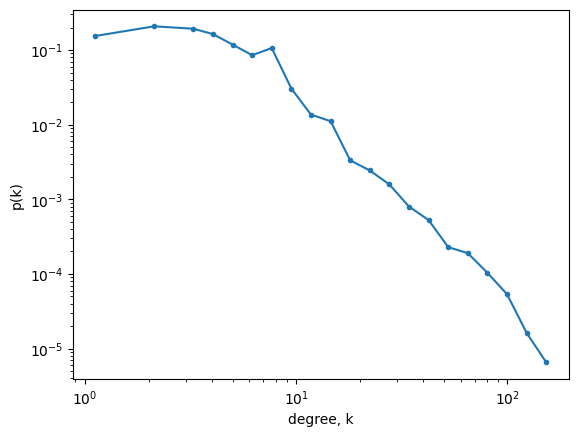

In [167]:
#reconstruct the graph from the JSON data
G_CSS = nx.node_link_graph(json_data)

#create dictionary of values 
degree_dict_CSS = dict(G_CSS.degree())
values = list(degree_dict_CSS.values())
print(np.mean(values))

min(values),max(values)

bins = np.logspace(0,np.log10(169),25)
hist, edges = np.histogram(values,bins=bins, density =True)
x= (edges[1:]+edges[:-1])/2

xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])

fig,ax = plt.subplots()
ax.plot(xx,yy,marker=".")
ax.set_xlabel("degree, k")
ax.set_ylabel("p(k)")
ax.set_xscale("log")
ax.set_yscale("log")


**Plot both degree distributions on the same figure using line plots, ensuring the x and y axes are scaled in a way that allows for comparison between the two distributions.**

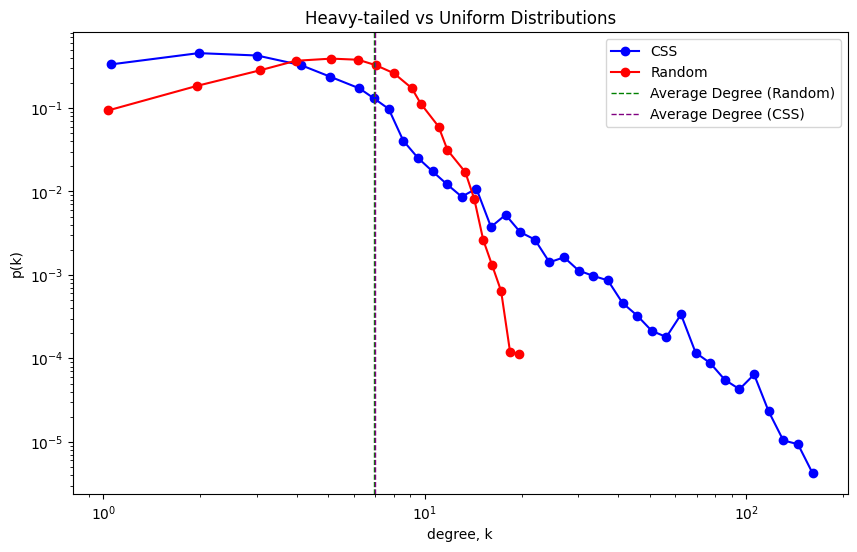

In [189]:

G_random = random_network
degree_dict = dict(G_random.degree())
degrees = np.array(list(degree_dict.values()))
bins_lin = np.logspace(0, np.log10(max(degrees)), 50)
hist_lin, edges_lin = np.histogram(degrees, bins=bins_lin, density=True)
x_lin = (edges_lin[1:] + edges_lin[:-1]) / 2


G_CSS = G_CSS  
degree_dict_CSS = dict(G_CSS.degree())
values = list(degree_dict_CSS.values())
bins_log = np.logspace(0, np.log10(max(values)), 50)
hist_log, edges_log = np.histogram(values, bins=bins_log, density=True)
x_log = (edges_log[1:] + edges_log[:-1]) / 2

xx_log, yy_log = zip(*[(i, j) for (i, j) in zip(x_log, hist_log) if j > 0])
xx_lin, yy_lin = zip(*[(i, j) for (i, j) in zip(x_lin, hist_lin) if j > 0])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot dots for heavy-tailed distribution with log-spaced bins
ax.plot(xx_log, yy_log, marker='o', linestyle='-', color='blue', label='CSS')

# Plot dots for uniform distribution with linear-spaced bins
ax.plot(xx_lin, yy_lin, marker='o', linestyle='-', color='red', label='Random')

# Add vertical lines with adjusted width
avg_degree_random = np.mean(degrees)
avg_degree_CSS = np.mean(values)

ax.axvline(x=avg_degree_random, color='green', linestyle='--', linewidth=1, label='Average Degree (Random)')
ax.axvline(x=avg_degree_CSS, color='purple', linestyle='--', linewidth=1, label='Average Degree (CSS)')

# Adding labels and legend
ax.set_title('Heavy-tailed vs Uniform Distributions')
ax.set_xlabel('degree, k')
ax.set_ylabel('p(k)')
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

# Show plot
plt.show()


**Add two vertical lines showing the average degree for the random and the real network.**

**Answer the following questions (max 200 words in total):**

> Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.

> What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties? (max 150 words)

### Part 2: Network Analysis in Computational Social Science
#### Exercise 1: Mixing Patterns and Assortativity

#### Part 1: Assortativity Coefficient

**Calculate the Assortativity Coefficient for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in this paper (equation 2, here for directed networks). Do not use the NetworkX implementation.**

#### Part 2: Configuration model

In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.

**Implement the configuration model using the double edge swap algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:**

> **a.** Create an exact copy of your original network.

> **b.** Select two edges, $e_1 = (u,v)$ and $e_2 = (x,y)$, ensuring u ≠ y and v ≠ x.

> **c.** Flip the direction of $e_1$ to $e_1 = (v,u)$ 50% of the time. This ensures that your final result is not biased, in case your edges were sorted. 

> **d.** Ensure that new edges $(e_1' = (e_1 \lfloor 0 \rfloor), (e_2 \lfloor 1 \rfloor))$ and $(e_2' = (e_2 \lfloor 0 \rfloor), (e_1 \lfloor 1 \rfloor))$ do not already exists in the network.


> **e.** Remove edges $e_1$ and $e_2$ and add edges $e_1'$ and $e_2'$.

> **f.** Repeat step **b** to **e** until you have performed *E\*10* swaps where E is the total number of edges. 

**Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.**

#### Part 3: Analyzing Assortativity in Random Networks

**Generate and analyze at least 100 random networks using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.**

#### Part 4: Assortativity by Degree

**Calculate degree assortativity for your network using the formula discussed in the lecture.**

**Compare your network's degree assortativity against that of 100 random networks generated via the configuration model. Analyze whether your network shows a tendency for high-degree scientists to connect with other high-degree scientists and vice versa.**

#### Part 5: Reflection questions (max 250 words for the 3 questions)

> *Assortativity by degree.* Were the results of the degree assortativity in line with your expectations? Why or why not?

Answer: 

> *Edge flipping.* In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing e_1 from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?

Answer: 

> *Distribution of assortativity in random networks.* Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations.

Answer:

#### Exercise 2: Central nodes

> Find the 5 most central scientists according to the closeness centrality. What role do you imagine scientists with high closeness centrality play?

Answer: 

> Find the 5 most central scientists according to eigenvector centrality.

Answer:

> Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why?

Answer: 

> Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

Answer: 

### Part 3 - Words that characterize Computational Social Science communities

#### Exercise 1: TF-IDF and the Computational Social Science communities. 

The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists. What you need for this exercise:

- The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.
- The tokenized abstract dataframe (Week 7, Exercise 2)


**First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf–idf). Explain in your own words the point of TF-IDF.**

> What does TF stand for? 

Answer: 


> What does IDF stand for? 

Answer:

**Now, we want to find out which words are important for each community, so we're going to create several large documents, one for each community. Each document includes all the tokens of abstracts written by members of a given community.**

> Consider a community *c* 

> Find all the abstracts of papers written by a member of community *c*



In [6]:
#code 

> Create a long array that stores all the abstract tokens


In [7]:
#code 

> Repeat for all the communities. Note: Here, to ensure your code is efficient, you shall exploit `pandas` builtin functions, such as `groupby.apply` or `explode`.

**Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the top 5 communities (by number of authors).**

> Describe similarities and differences between the communities.

Answer:

> Why aren't the TFs not necessarily a good description of the communities?

Answer: 


> Next, we calculate IDF for every word.


In [8]:
#code?

> What base logarithm did you use? Is that important?

Answer: 

**We're ready to calculate TF-IDF. Do that for the top 9 communities (by number of authors). Then for each community:** 

- List the 10 top TF words
- List the 10 top TF-IDF words
- List the top 3 authors (by degree)
- Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?

In [9]:
#Code ?? Dont know 

#### Exercise 2: The Wordcloud.

- Install the `WordCloud` module. 
- Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
- Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration).
- Comment on your results. What can you conclude on the different sub-communities in Computational Social Science?
- Look up online the top author in each community. In light of your search, do your results make sense?

#### Exercise 3: Computational Social Science

- Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science.

> In light of your data-driven analysis, has your understanding of the field changed? How? (max 150 words)

Answer: 